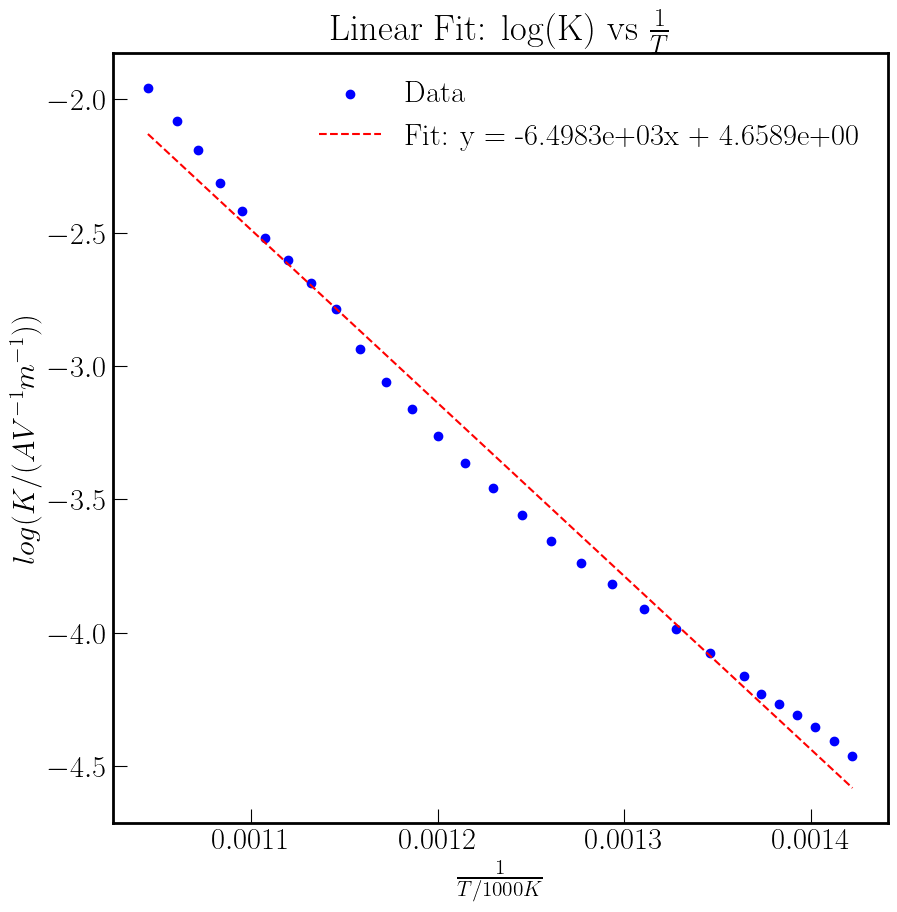

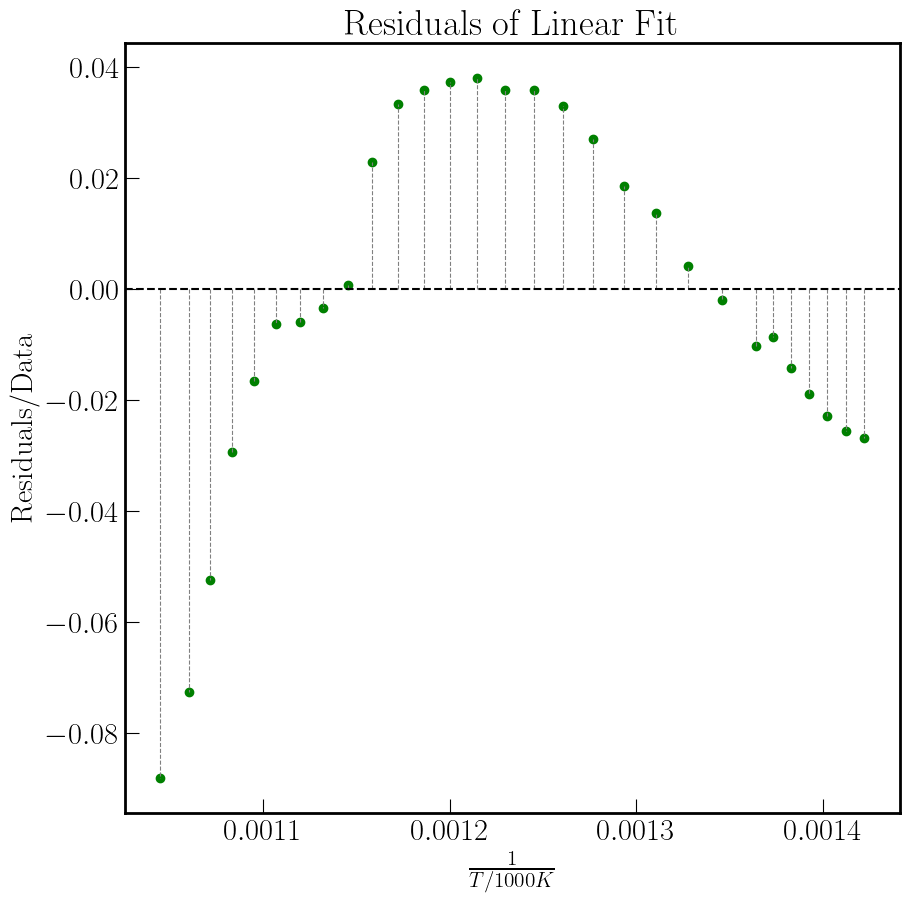

Slope: -6.498283e+03
Intercept: 4.658891e+00


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["axes.linewidth"]  = 2.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = False  # Should be boolean, not string
plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams['font.family']="serif"
plt.rc("text", usetex=True)
plt.rc("font", size=22)


# 1) Import the Excel file
file_path = "Ionic Conduction, 6_8.xlsx"  # adjust path if needed
df = pd.read_excel(file_path)

# 2) Extract Column F (log(K)) and Column G (1/T)
y = df.iloc[:, 5]  # Column F = log(K)
x = df.iloc[:, 6]  # Column G = 1/T

# Remove NaN values
mask = ~(x.isna() | y.isna())
x, y = x[mask], y[mask]

# 3) Do a linear fit with polyfit
coeffs = np.polyfit(x, y, 1)
fit_fn = np.poly1d(coeffs)

# 4) Plot Column F vs Column G with fit
plt.figure(figsize=(10, 10))
plt.scatter(x, y, label="Data", color="blue")
plt.plot(x, fit_fn(x), label=f"Fit: y = {coeffs[0]:.4e}x + {coeffs[1]:.4e}", color="red", linestyle="--")
plt.xlabel(r"$\frac{1}{T/1000K}$")
plt.ylabel(r"$log(K/(AV^{-1}m^{-1}))$")
plt.legend()
plt.title(r"Linear Fit: log(K) vs $\frac{1}{T}$")
plt.show()

# 5) Plot residuals
residuals = (y - fit_fn(x))/y
plt.figure(figsize=(10, 10))
plt.scatter(x, residuals, color="green")
for xi, ri in zip(x, residuals):
    plt.plot([xi, xi], [0, ri], color="gray", linestyle="--", linewidth=0.8)
plt.axhline(0, color="black", linestyle="--")
plt.xlabel(r"$\frac{1}{T/1000K}$")
plt.ylabel("Residuals/Data")
plt.title("Residuals of Linear Fit")
plt.savefig('plotwithknee.png')
plt.show()

# Print parameter values
print(f"Slope: {coeffs[0]:.6e}")
print(f"Intercept: {coeffs[1]:.6e}")




## Before the "knee" 

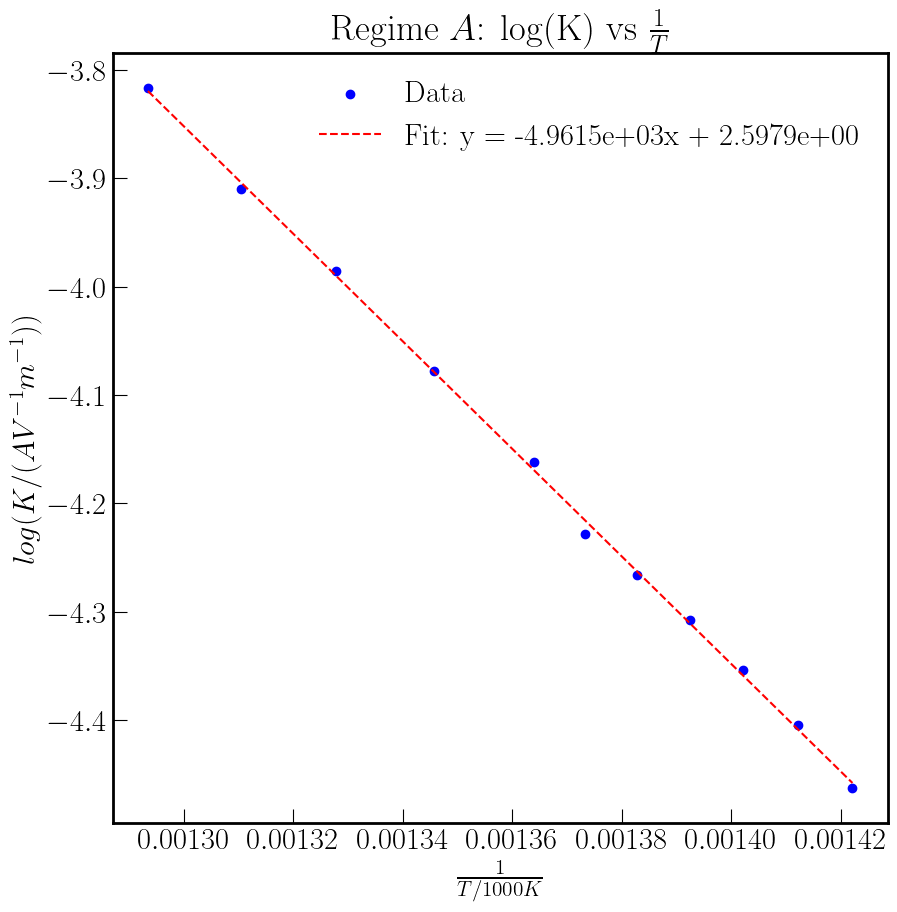

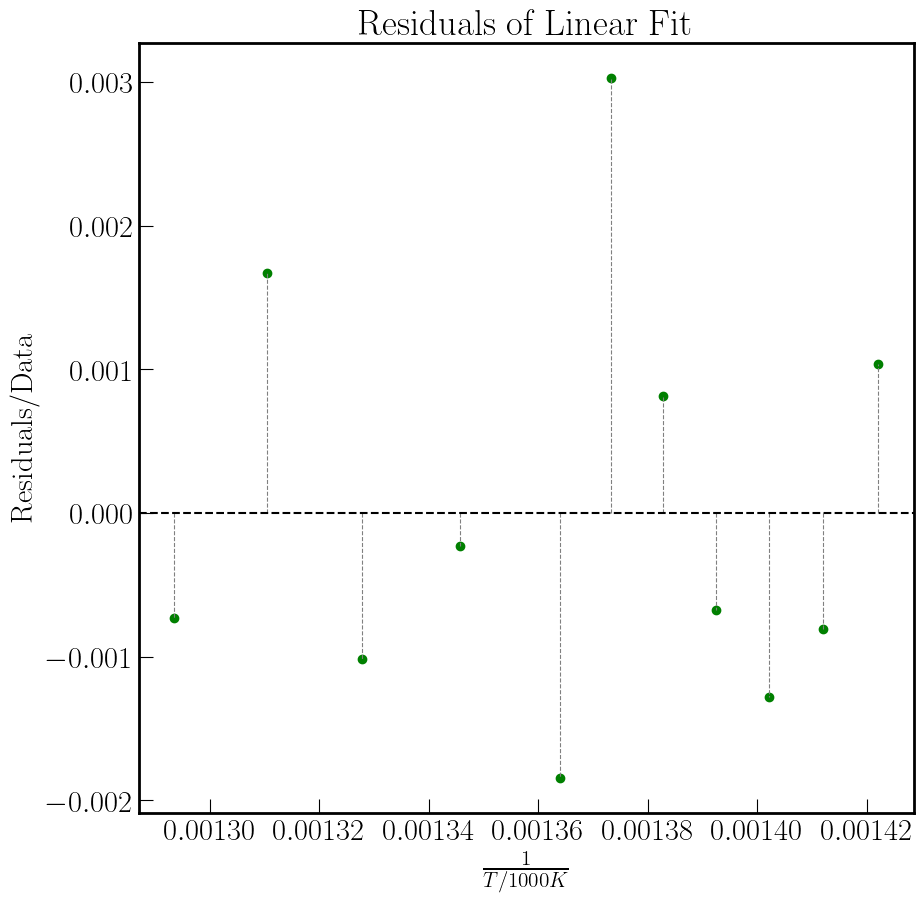

Slope: -4.961523e+03
Intercept: 2.597906e+00


In [29]:
mask_knee=((1/x)<500+273.16)

x1=x[mask_knee]
y1=y[mask_knee]

# 3) Do a linear fit with polyfit
coeffs = np.polyfit(x1, y1, 1)
fit_fn = np.poly1d(coeffs)

# 4) Plot Column F vs Column G with fit
plt.figure(figsize=(10, 10))
plt.scatter(x1, y1, label="Data", color="blue")
plt.plot(x1, fit_fn(x1), label=f"Fit: y = {coeffs[0]:.4e}x + {coeffs[1]:.4e}", color="red", linestyle="--")
plt.xlabel(r"$\frac{1}{T/1000K}$")
plt.ylabel(r"$log(K/(AV^{-1}m^{-1}))$")
plt.legend()
plt.title(r"Regime $A$: log(K) vs $\frac{1}{T}$")
plt.show()

# 5) Plot residuals
residuals = (y1 - fit_fn(x1))/y1
plt.figure(figsize=(10, 10))
plt.scatter(x1, residuals, color="green")
for xi, ri in zip(x1, residuals):
    plt.plot([xi, xi], [0, ri], color="gray", linestyle="--", linewidth=0.8)
plt.axhline(0, color="black", linestyle="--")
plt.xlabel(r"$\frac{1}{T/1000K}$")
plt.ylabel("Residuals/Data")
plt.title("Residuals of Linear Fit")
plt.savefig('plotA.png')
plt.show()

# Print parameter values
print(f"Slope: {coeffs[0]:.6e}")
print(f"Intercept: {coeffs[1]:.6e}")



# After the "knee"

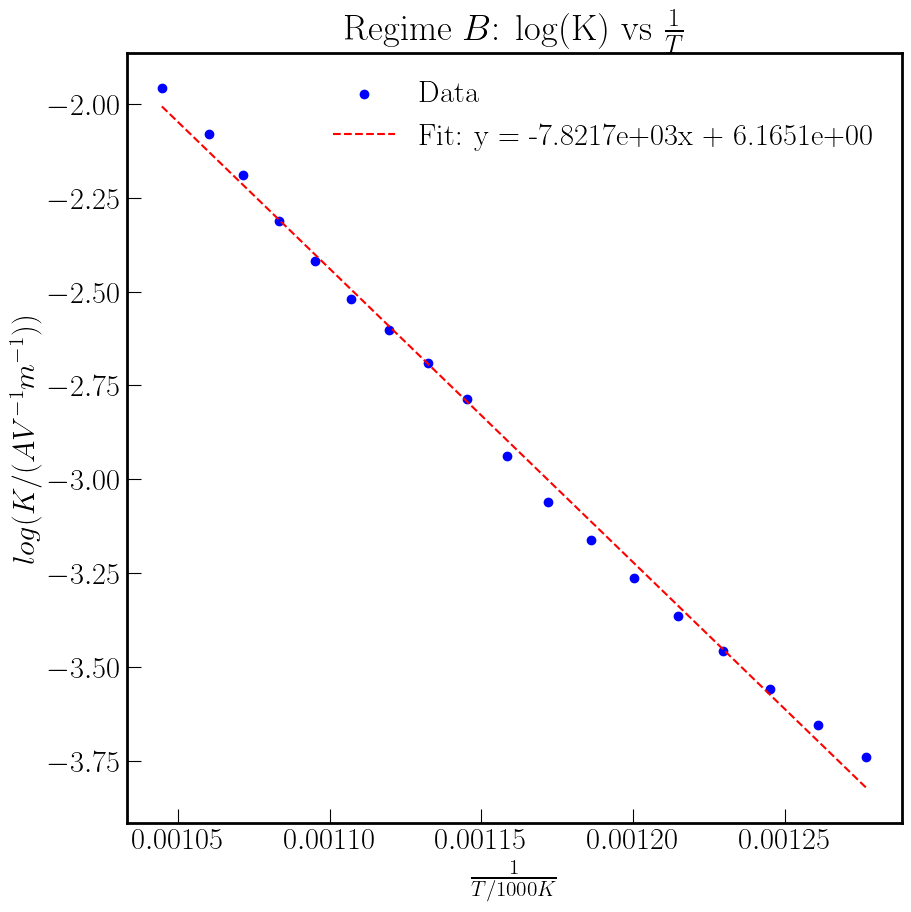

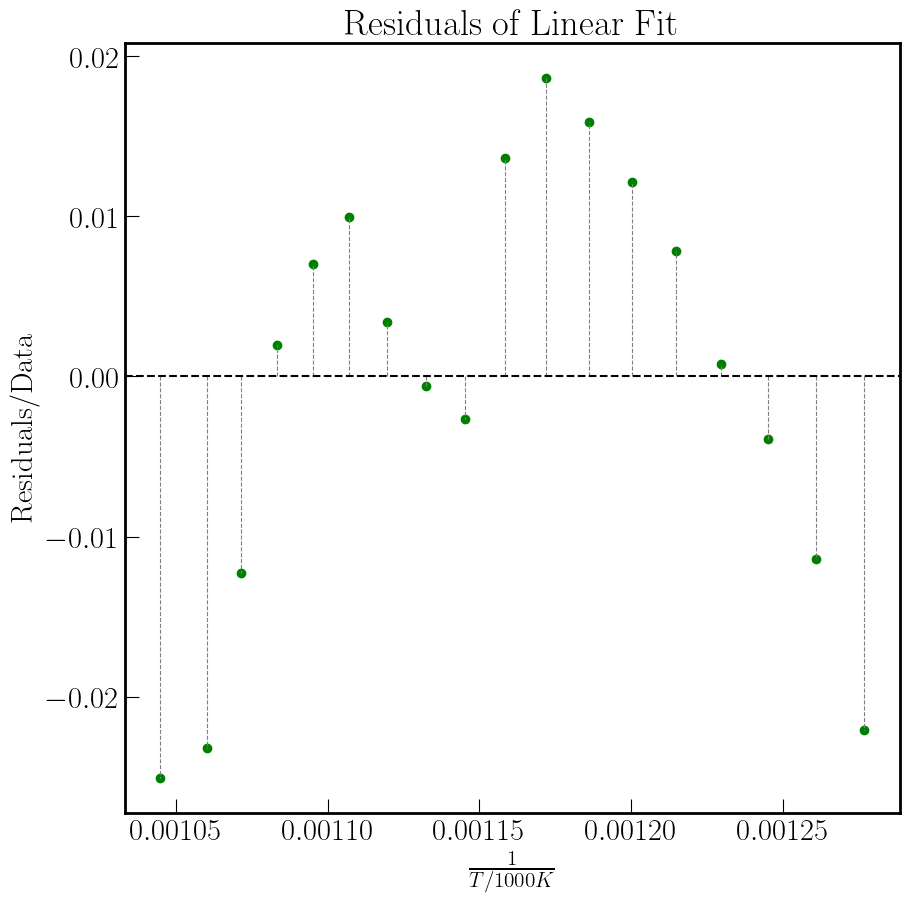

Slope: -7.821730e+03
Intercept: 6.165104e+00


In [30]:
mask_knee=((1/x)>500+273.16)

x2=x[mask_knee]
y2=y[mask_knee]

# 3) Do a linear fit with polyfit
coeffs = np.polyfit(x2, y2, 1)
fit_fn = np.poly1d(coeffs)

# 4) Plot Column F vs Column G with fit
plt.figure(figsize=(10, 10))
plt.scatter(x2, y2, label="Data", color="blue")
plt.plot(x2, fit_fn(x2), label=f"Fit: y = {coeffs[0]:.4e}x + {coeffs[1]:.4e}", color="red", linestyle="--")
plt.xlabel(r"$\frac{1}{T/1000K}$")
plt.ylabel(r"$log(K/(AV^{-1}m^{-1}))$")
plt.legend()
plt.title(r"Regime $B$: log(K) vs $\frac{1}{T}$")
plt.show()

# 5) Plot residuals
residuals = (y2 - fit_fn(x2))/y2
plt.figure(figsize=(10, 10))
plt.scatter(x2, residuals, color="green")
for xi, ri in zip(x2, residuals):
    plt.plot([xi, xi], [0, ri], color="gray", linestyle="--", linewidth=0.8)
plt.axhline(0, color="black", linestyle="--")
plt.xlabel(r"$\frac{1}{T/1000K}$")
plt.ylabel("Residuals/Data")
plt.title("Residuals of Linear Fit")
plt.savefig('plotB.png')
plt.show()

# Print parameter values
print(f"Slope: {coeffs[0]:.6e}")
print(f"Intercept: {coeffs[1]:.6e}")



# Error Analysis for the entire temperature range


[statsmodels results]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1881.
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           1.67e-26
Time:                        14:46:55   Log-Likelihood:                 27.958
No. Observations:                  29   AIC:                            -51.92
Df Residuals:                      27   BIC:                            -49.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6589      0.

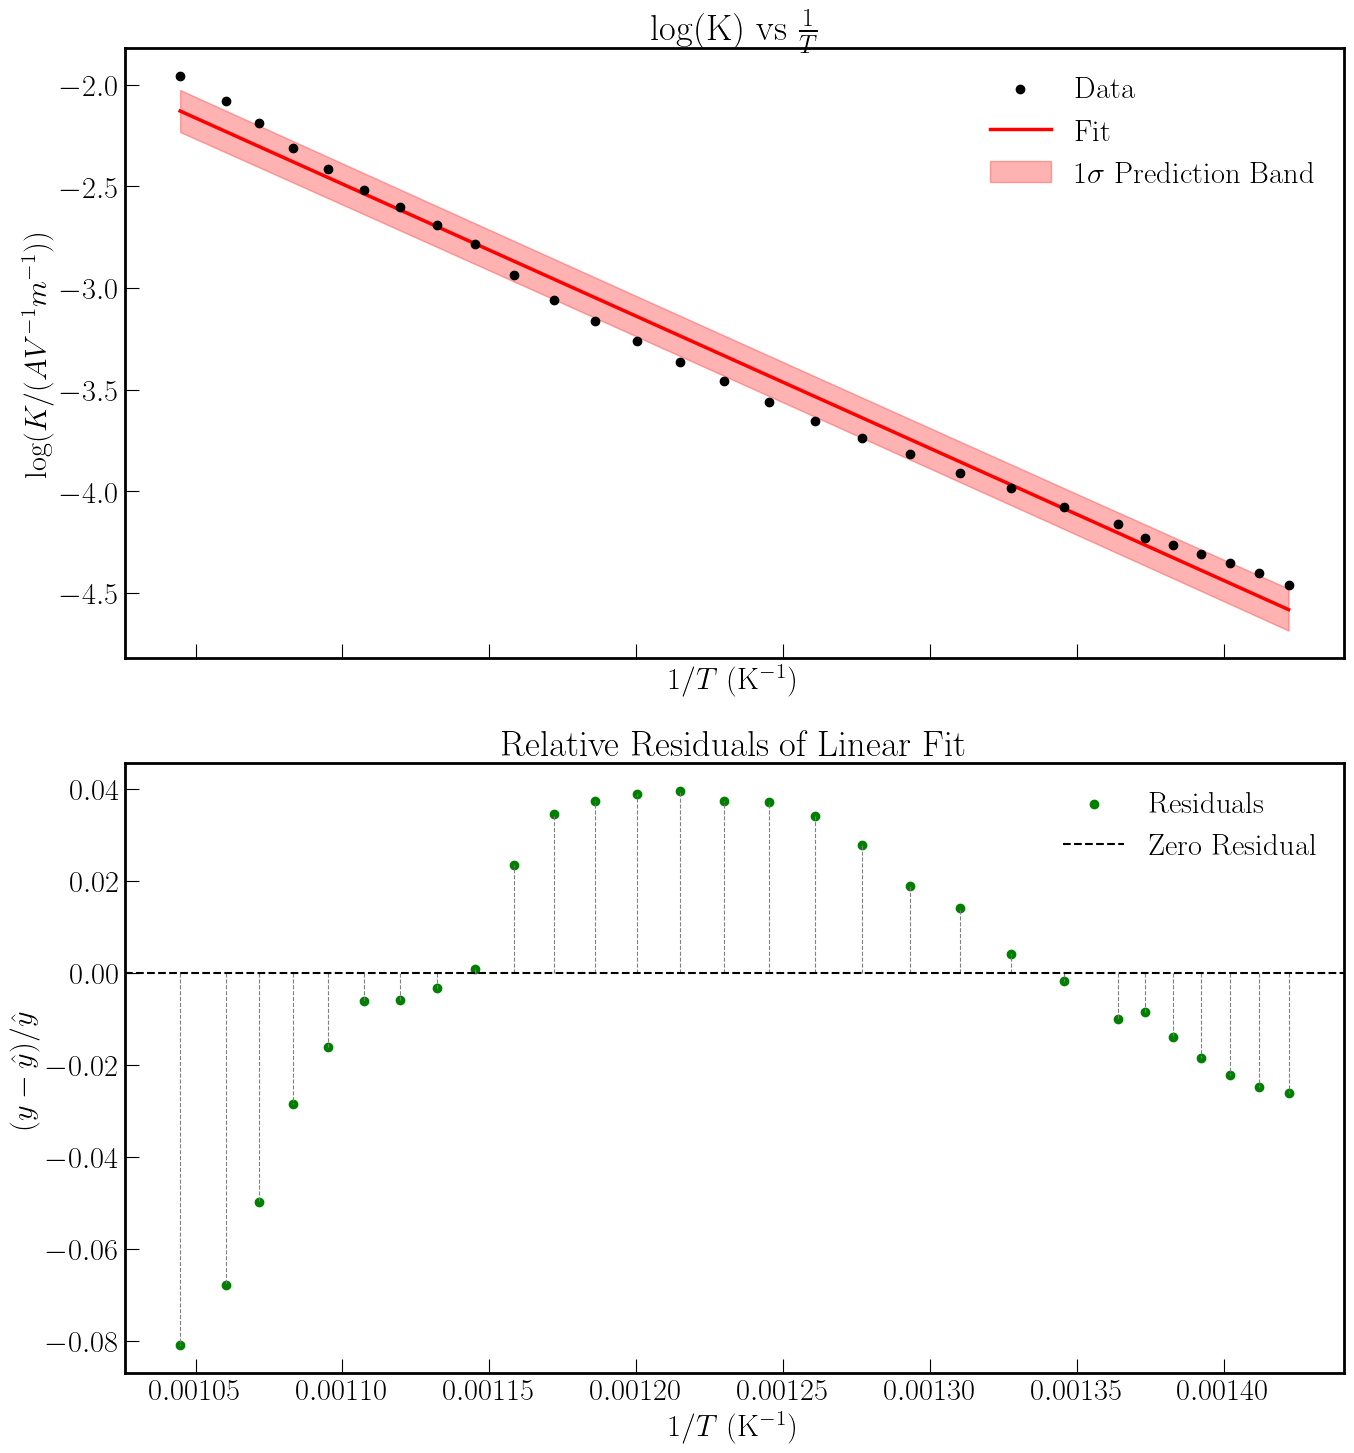

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.rcParams["axes.linewidth"]  = 2.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = False
plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams['font.family']="serif"
plt.rc("text", usetex=True)
plt.rc("font", size=22)

# 1) Import the Excel file
file_path = "Ionic Conduction, 6_8.xlsx"
df = pd.read_excel(file_path)

# 2) Extract Column F (log(K)) and Column G (1/T)
y = df.iloc[:, 5]  # Column F
x = df.iloc[:, 6]  # Column G

# Remove NaN values
mask = ~(x.isna() | y.isna())
x, y = x[mask], y[mask]

# --- statsmodels fit ---
X_sm = sm.add_constant(x.values)  # add intercept
model = sm.OLS(y.values, X_sm)
results = model.fit()

print("\n[statsmodels results]")
print(results.summary())
print(f"R^2 (statsmodels): {results.rsquared}")

# Extract parameters and covariance matrix
params = results.params
cov = results.cov_params()
errors = np.sqrt(np.diag(cov))

print("\nFitted parameters:")
print(params)
print("\nCovariance matrix:")
print(cov)
print("\nParameter uncertainties (1-sigma):")
print(errors)

# --- Build prediction grid ---
x_pred = np.linspace(x.min(), x.max(), 200)
X_pred = sm.add_constant(x_pred)   # must match fit design matrix

# --- Get predictions and intervals ---
pred_summary = results.get_prediction(X_pred).summary_frame(alpha=0.317)  # 1-sigma

y_pred = pred_summary['mean']
pred_ci_lower = pred_summary['mean_ci_lower']    # Confidence interval
pred_ci_upper = pred_summary['mean_ci_upper']
pred_pi_lower = pred_summary['obs_ci_lower']     # Prediction interval
pred_pi_upper = pred_summary['obs_ci_upper']

# --- Plot with error bands ---
fig, axs = plt.subplots(2, 1, figsize=(14, 15), sharex=True)
axs[0].scatter(x, y, label="Data", color="black", zorder=10)
axs[0].plot(x_pred, y_pred, label="Fit", color="red", linewidth=2.5)

# Prediction interval (wide)
axs[0].fill_between(x_pred, pred_pi_lower, pred_pi_upper,
                 color="red", alpha=0.3, label=r"$1\sigma$ Prediction Band")

# Optional: Confidence interval (narrower)
# plt.fill_between(x_pred, pred_ci_lower, pred_ci_upper,
#                  color="blue", alpha=0.3, label=r"$1\sigma$ Confidence Band")

axs[0].set_xlabel(r"$1/T$ (K$^{-1}$)")
axs[0].set_ylabel(r"$\log(K/(AV^{-1}m^{-1}))$")
axs[0].set_title(r"log(K) vs $\frac{1}{T}$")
axs[0].legend()
# --- Compute fitted values ---
y_fit = results.predict(X_sm)

# --- Compute relative residuals ---
residuals = (y - y_fit) / y_fit

# --- Residual plot ---
axs[1].scatter(x, residuals, color="green", label="Residuals")

# Drop perpendicular (vertical) lines from residuals to 0 line
for xi, ri in zip(x, residuals):
    axs[1].plot([xi, xi], [0, ri], color="gray", linestyle="--", linewidth=0.8)

axs[1].axhline(0, color="black", linestyle="--", label="Zero Residual")
axs[1].set_xlabel(r"$1/T$ (K$^{-1}$)")
axs[1].set_ylabel(r"$(y - \hat{y})/\hat{y}$")
axs[1].set_title("Relative Residuals of Linear Fit")
axs[1].legend()

plt.tight_layout()
plt.savefig("plotfull.png", dpi=300)

plt.show()


# Before the knee


[statsmodels results]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.053e+04
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           4.03e-15
Time:                        14:47:21   Log-Likelihood:                 40.948
No. Observations:                  11   AIC:                            -77.90
Df Residuals:                       9   BIC:                            -77.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5979      0.

/home/anargha/anaconda3/envs/base2/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


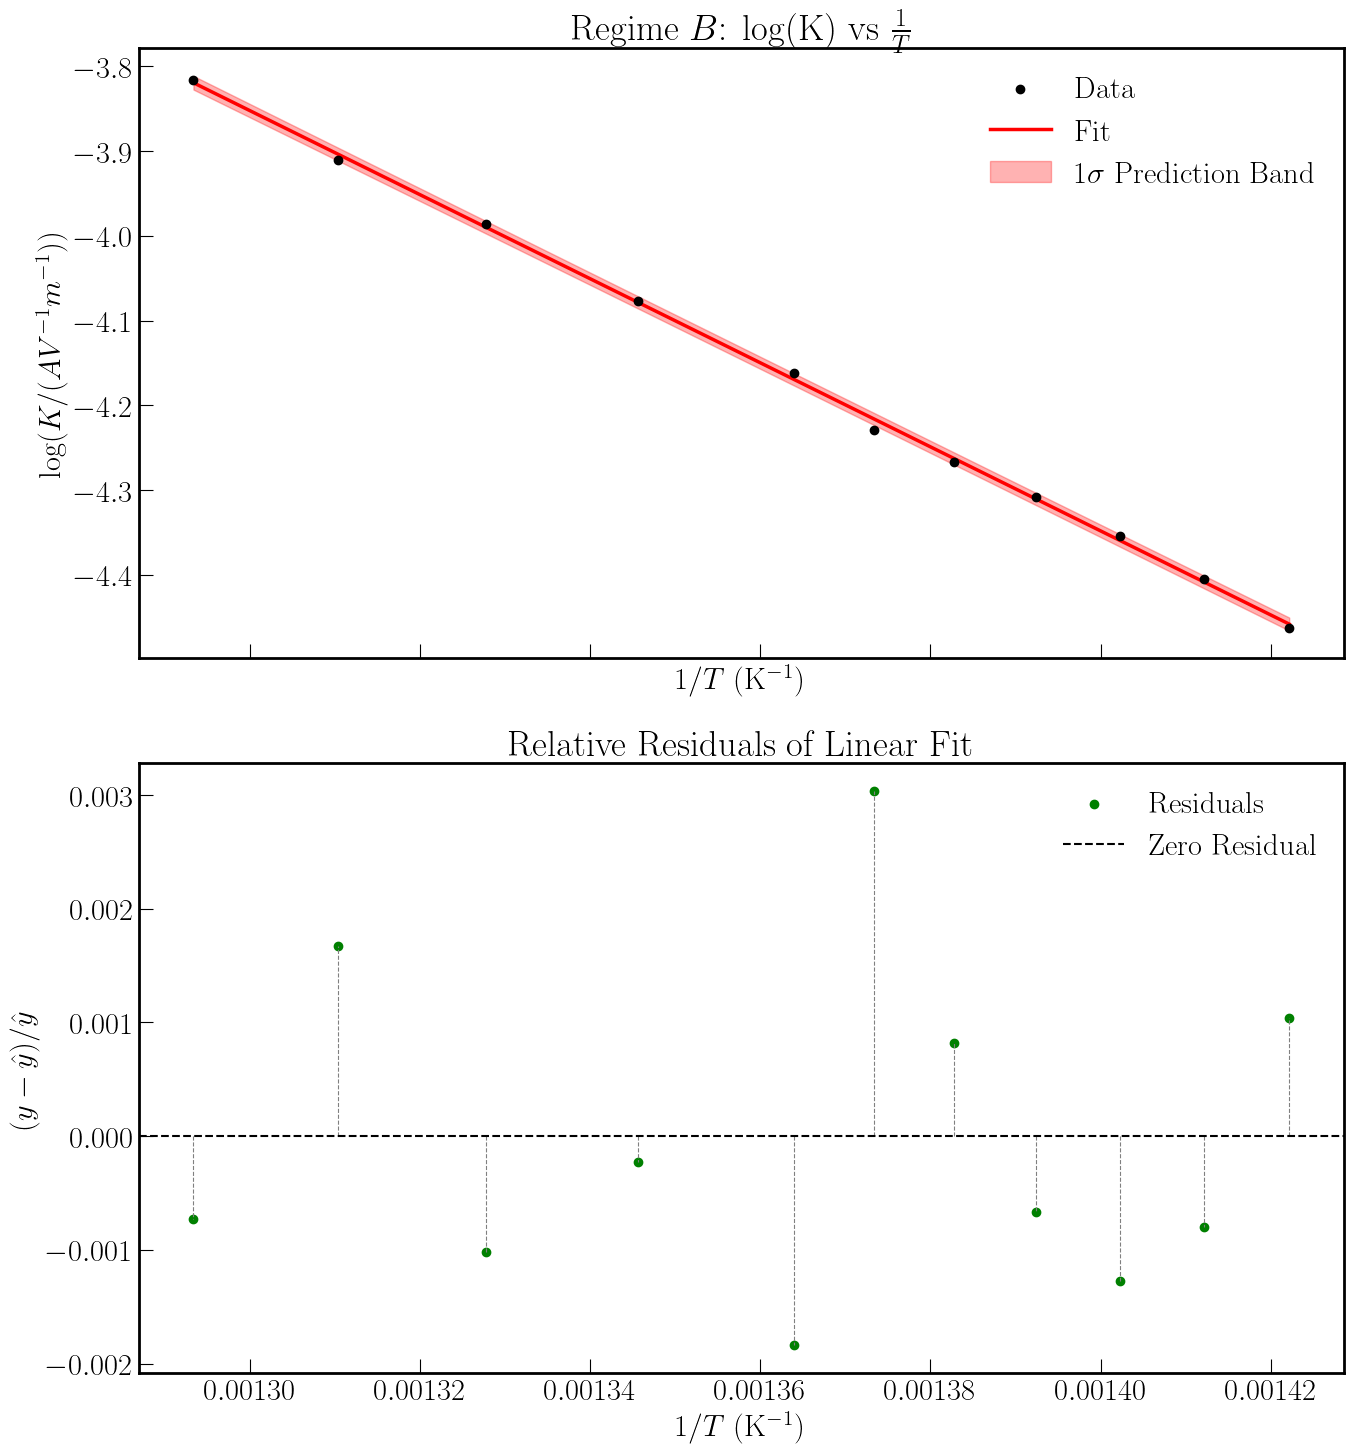

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.rcParams["axes.linewidth"]  = 2.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = False
plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams['font.family']="serif"
plt.rc("text", usetex=True)
plt.rc("font", size=22)

# 1) Import the Excel file
file_path = "Ionic Conduction, 6_8.xlsx"
df = pd.read_excel(file_path)

# 2) Extract Column F (log(K)) and Column G (1/T)
y = df.iloc[:, 5]  # Column F
x = df.iloc[:, 6]  # Column G

# Remove NaN values
mask = ~(x.isna() | y.isna())
x, y = x[mask], y[mask]
mask_knee=((1/x)<500+273.16)

x=x[mask_knee]
y=y[mask_knee]

# --- statsmodels fit ---
X_sm = sm.add_constant(x.values)  # add intercept
model = sm.OLS(y.values, X_sm)
results = model.fit()

print("\n[statsmodels results]")
print(results.summary())
print(f"R^2 (statsmodels): {results.rsquared}")

# Extract parameters and covariance matrix
params = results.params
cov = results.cov_params()
errors = np.sqrt(np.diag(cov))

print("\nFitted parameters:")
print(params)
print("\nCovariance matrix:")
print(cov)
print("\nParameter uncertainties (1-sigma):")
print(errors)

# --- Build prediction grid ---
x_pred = np.linspace(x.min(), x.max(), 200)
X_pred = sm.add_constant(x_pred)   # must match fit design matrix

# --- Get predictions and intervals ---
pred_summary = results.get_prediction(X_pred).summary_frame(alpha=0.317)  # 1-sigma

y_pred = pred_summary['mean']
pred_ci_lower = pred_summary['mean_ci_lower']    # Confidence interval
pred_ci_upper = pred_summary['mean_ci_upper']
pred_pi_lower = pred_summary['obs_ci_lower']     # Prediction interval
pred_pi_upper = pred_summary['obs_ci_upper']

# --- Plot with error bands ---
fig, axs = plt.subplots(2, 1, figsize=(14, 15), sharex=True)
axs[0].scatter(x, y, label="Data", color="black", zorder=10)
axs[0].plot(x_pred, y_pred, label="Fit", color="red", linewidth=2.5)

# Prediction interval (wide)
axs[0].fill_between(x_pred, pred_pi_lower, pred_pi_upper,
                 color="red", alpha=0.3, label=r"$1\sigma$ Prediction Band")

# Optional: Confidence interval (narrower)
# plt.fill_between(x_pred, pred_ci_lower, pred_ci_upper,
#                  color="blue", alpha=0.3, label=r"$1\sigma$ Confidence Band")

axs[0].set_xlabel(r"$1/T$ (K$^{-1}$)")
axs[0].set_ylabel(r"$\log(K/(AV^{-1}m^{-1}))$")
axs[0].set_title(r"Regime $B$: log(K) vs $\frac{1}{T}$")
axs[0].legend()
# --- Compute fitted values ---
y_fit = results.predict(X_sm)

# --- Compute relative residuals ---
residuals = (y - y_fit) / y_fit

# --- Residual plot ---
axs[1].scatter(x, residuals, color="green", label="Residuals")

# Drop perpendicular (vertical) lines from residuals to 0 line
for xi, ri in zip(x, residuals):
    axs[1].plot([xi, xi], [0, ri], color="gray", linestyle="--", linewidth=0.8)

axs[1].axhline(0, color="black", linestyle="--", label="Zero Residual")
axs[1].set_xlabel(r"$1/T$ (K$^{-1}$)")
axs[1].set_ylabel(r"$(y - \hat{y})/\hat{y}$")
axs[1].set_title("Relative Residuals of Linear Fit")
axs[1].legend()

plt.tight_layout()
plt.savefig("plotA.png", dpi=300)

plt.show()


# After the knee


[statsmodels results]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3435.
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           4.20e-20
Time:                        14:47:39   Log-Likelihood:                 33.686
No. Observations:                  18   AIC:                            -63.37
Df Residuals:                      16   BIC:                            -61.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1651      0.

/home/anargha/anaconda3/envs/base2/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


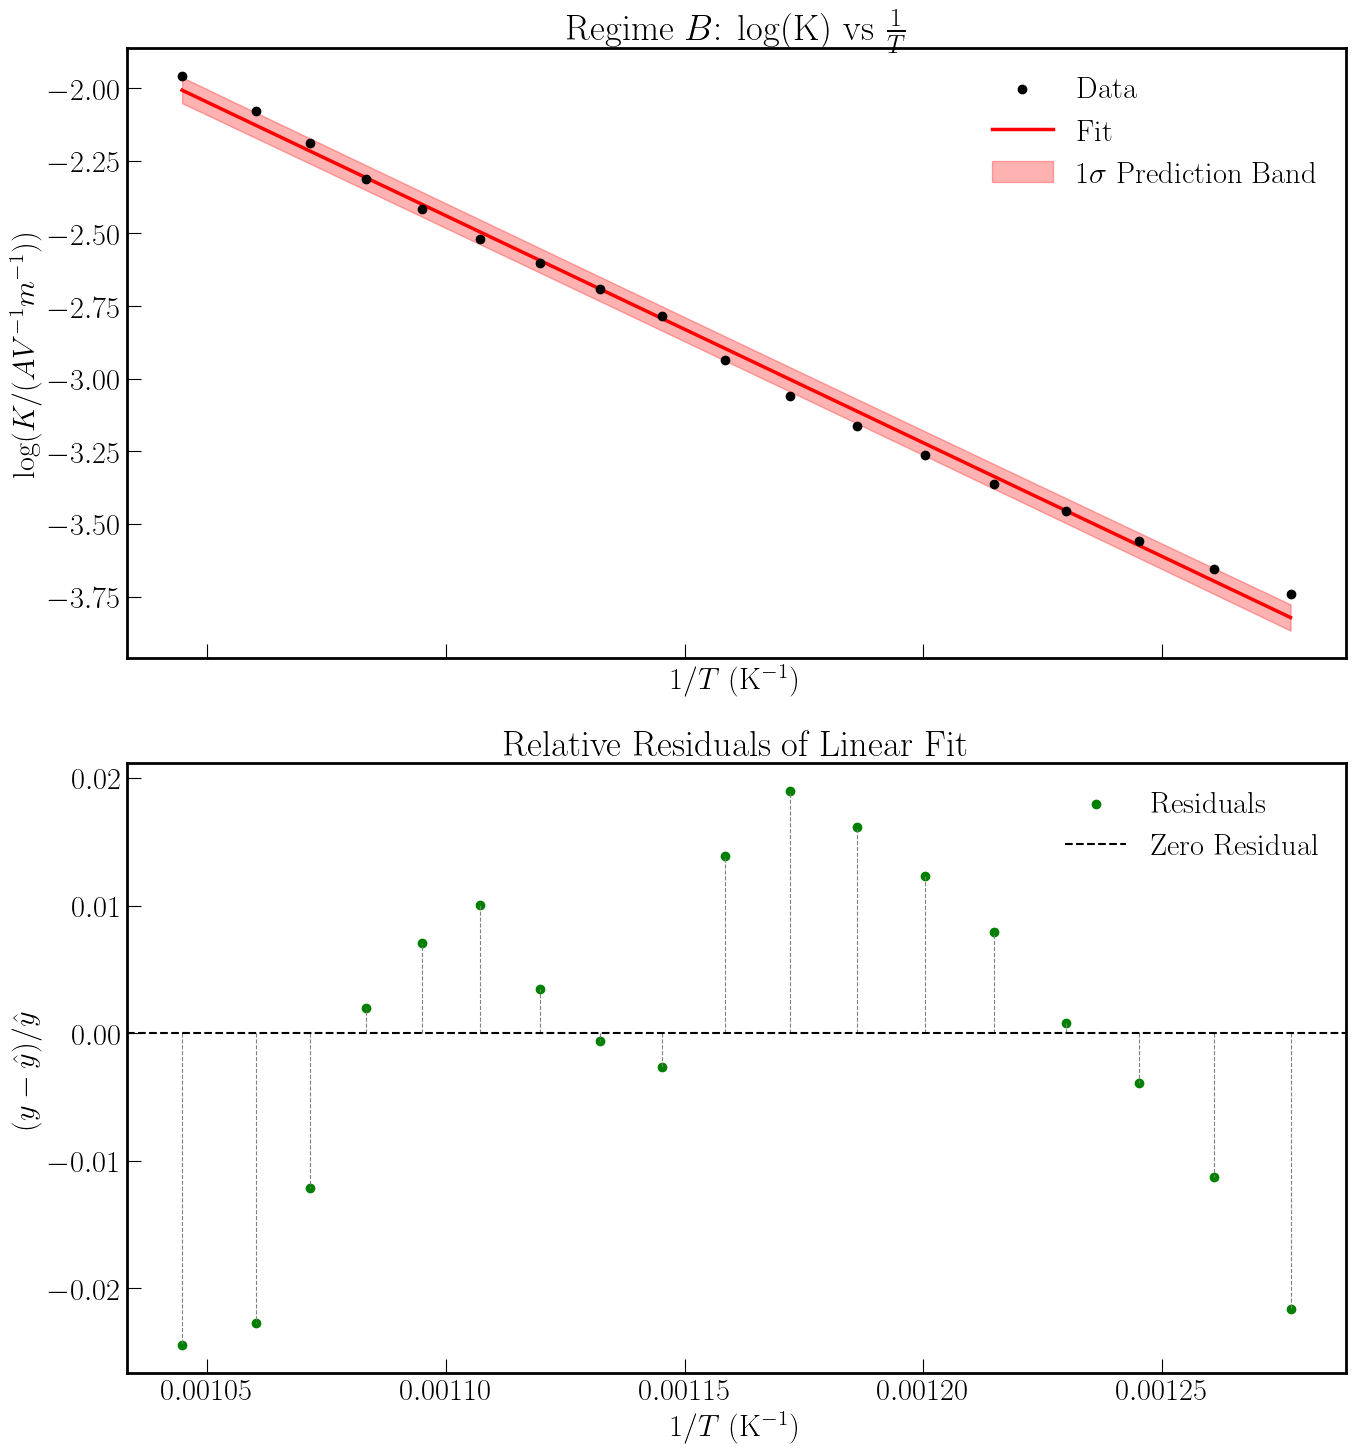

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.rcParams["axes.linewidth"]  = 2.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = False
plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams['font.family']="serif"
plt.rc("text", usetex=True)
plt.rc("font", size=22)

# 1) Import the Excel file
file_path = "Ionic Conduction, 6_8.xlsx"
df = pd.read_excel(file_path)

# 2) Extract Column F (log(K)) and Column G (1/T)
y = df.iloc[:, 5]  # Column F
x = df.iloc[:, 6]  # Column G

# Remove NaN values
mask = ~(x.isna() | y.isna())
x, y = x[mask], y[mask]
mask_knee=((1/x)>500+273.16)

x=x[mask_knee]
y=y[mask_knee]

# --- statsmodels fit ---
X_sm = sm.add_constant(x.values)  # add intercept
model = sm.OLS(y.values, X_sm)
results = model.fit()

print("\n[statsmodels results]")
print(results.summary())
print(f"R^2 (statsmodels): {results.rsquared}")

# Extract parameters and covariance matrix
params = results.params
cov = results.cov_params()
errors = np.sqrt(np.diag(cov))

print("\nFitted parameters:")
print(params)
print("\nCovariance matrix:")
print(cov)
print("\nParameter uncertainties (1-sigma):")
print(errors)

# --- Build prediction grid ---
x_pred = np.linspace(x.min(), x.max(), 200)
X_pred = sm.add_constant(x_pred)   # must match fit design matrix

# --- Get predictions and intervals ---
pred_summary = results.get_prediction(X_pred).summary_frame(alpha=0.317)  # 1-sigma

y_pred = pred_summary['mean']
pred_ci_lower = pred_summary['mean_ci_lower']    # Confidence interval
pred_ci_upper = pred_summary['mean_ci_upper']
pred_pi_lower = pred_summary['obs_ci_lower']     # Prediction interval
pred_pi_upper = pred_summary['obs_ci_upper']

# --- Plot with error bands ---
fig, axs = plt.subplots(2, 1, figsize=(14, 15), sharex=True)
axs[0].scatter(x, y, label="Data", color="black", zorder=10)
axs[0].plot(x_pred, y_pred, label="Fit", color="red", linewidth=2.5)

# Prediction interval (wide)
axs[0].fill_between(x_pred, pred_pi_lower, pred_pi_upper,
                 color="red", alpha=0.3, label=r"$1\sigma$ Prediction Band")

# Optional: Confidence interval (narrower)
# plt.fill_between(x_pred, pred_ci_lower, pred_ci_upper,
#                  color="blue", alpha=0.3, label=r"$1\sigma$ Confidence Band")

axs[0].set_xlabel(r"$1/T$ (K$^{-1}$)")
axs[0].set_ylabel(r"$\log(K/(AV^{-1}m^{-1}))$")
axs[0].set_title(r"Regime $B$: log(K) vs $\frac{1}{T}$")
axs[0].legend()
# --- Compute fitted values ---
y_fit = results.predict(X_sm)

# --- Compute relative residuals ---
residuals = (y - y_fit) / y_fit

# --- Residual plot ---
axs[1].scatter(x, residuals, color="green", label="Residuals")

# Drop perpendicular (vertical) lines from residuals to 0 line
for xi, ri in zip(x, residuals):
    axs[1].plot([xi, xi], [0, ri], color="gray", linestyle="--", linewidth=0.8)

axs[1].axhline(0, color="black", linestyle="--", label="Zero Residual")
axs[1].set_xlabel(r"$1/T$ (K$^{-1}$)")
axs[1].set_ylabel(r"$(y - \hat{y})/\hat{y}$")
axs[1].set_title("Relative Residuals of Linear Fit")
axs[1].legend()

plt.tight_layout()
plt.savefig("plotB.png", dpi=300)

plt.show()
